In [20]:
import torch
from torchvision import datasets
from torchvision import transforms
import torch.nn.functional as F
from torch import nn
from torch.cuda import is_available
from torchsummary import summary
import matplotlib.pyplot as plt
import numpy as np
from utils import viewPlots

In [21]:
device = torch.device("cuda" if is_available() else "cpu")
device

device(type='cuda')

In [22]:
train_transforms = transforms.Compose(
    [
        transforms.RandomApply(
            [
                transforms.CenterCrop(22),
            ],
            p=0.1,
        ),
        transforms.Resize((28, 28)),
        transforms.RandomRotation((-15.0, 15.0), fill=0),
        transforms.ToTensor(),
        transforms.Normalize((0.1307,), (0.3081,)),
    ]
)

test_transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1325,), (0.3105,))
    ])

In [23]:
training_data = datasets.MNIST('./data',train=True,download=True,transform=train_transforms)
testing_data = datasets.MNIST('./data',train=False,download=True,transform=test_transforms)
# testing_data,validation_data = torch.utils.data.random_split(testing_data,[1000,9000])

In [24]:
kwargs = {'batch_size': 512, 'shuffle': True, 'num_workers': 2, 'pin_memory': True}
train_loader = torch.utils.data.DataLoader(training_data, **kwargs)
kwargs = {'batch_size': 100, 'shuffle': True, 'num_workers': 2, 'pin_memory': True}
test_loader = torch.utils.data.DataLoader(testing_data, **kwargs)
val_loader = torch.utils.data.DataLoader(testing_data, **kwargs)


batch_data[i]:  torch.Size([1, 28, 28])
batch_data[i]:  torch.Size([1, 28, 28])
batch_data[i]:  torch.Size([1, 28, 28])
batch_data[i]:  torch.Size([1, 28, 28])
batch_data[i]:  torch.Size([1, 28, 28])
batch_data[i]:  torch.Size([1, 28, 28])
batch_data[i]:  torch.Size([1, 28, 28])
batch_data[i]:  torch.Size([1, 28, 28])
batch_data[i]:  torch.Size([1, 28, 28])
batch_data[i]:  torch.Size([1, 28, 28])


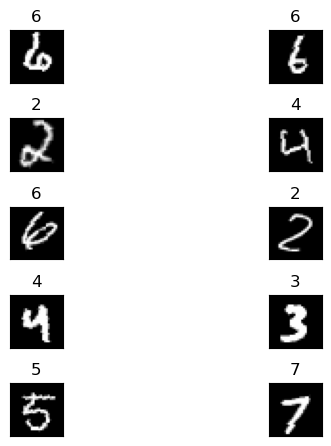

In [25]:
batch_data, batch_label = next(iter(train_loader))
viewPlots(batch_data,batch_label,10)

In [26]:

class MNet(nn.Module):
    def __init__(self, *args, **kwargs) -> None:
        super().__init__(*args, **kwargs)
        # self.dropout = nn.Dropout(0.2)
        # self.conv1 = nn.Conv2d(1,20,kernel_size=3) 
        # self.conv2 = nn.Conv2d(20,30,3)
        # self.conv3 = nn.Conv2d(30,40,3)
        # self.batch_norm = nn.BatchNorm2d(40)
        # self.linear1 = nn.Linear(3*3*40,10)
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=128,
        kernel_size=3, padding=1)
        self.bn1 = nn.BatchNorm2d(num_features=128)
        self.tns1 = nn.Conv2d(in_channels=128, out_channels=4,
        kernel_size=1, padding=1)
        self.conv2 = nn.Conv2d(in_channels=4, out_channels=16,
        kernel_size=3, padding=1)
        self.bn2 = nn.BatchNorm2d(num_features=16)
        self.pool1 = nn.MaxPool2d(2, 2)
        self.conv3 = nn.Conv2d(in_channels=16, out_channels=16,
        kernel_size=3, padding=1)
        self.bn3 = nn.BatchNorm2d(num_features=16)
        self.conv4 = nn.Conv2d(in_channels=16, out_channels=32,
        kernel_size=3, padding=1)
        self.bn4 = nn.BatchNorm2d(num_features=32)
       
        self.pool2 = nn.MaxPool2d(2, 2)
        self.tns2 = nn.Conv2d(in_channels=32, out_channels=16,
        kernel_size=1, padding=1)
        
        self.conv5 = nn.Conv2d(in_channels=16, out_channels=16,
        kernel_size=3, padding=1)
        self.bn5 = nn.BatchNorm2d(num_features=16)
        self.conv6 = nn.Conv2d(in_channels=16, out_channels=32,
        kernel_size=3, padding=1)
        self.bn6 = nn.BatchNorm2d(num_features=32)
        self.conv7 = nn.Conv2d(in_channels=32, out_channels=10,
        kernel_size=1, padding=1)
        self.gpool = nn.AvgPool2d(kernel_size=7)
        self.drop = nn.Dropout2d(0.1)


    
    def forward(self,x):
        # x = self.dropout(x)
        # x = self.conv1(x) #28>26
        # x = F.relu(x)
        # x = F.relu(self.conv2(x)) #26>24
        # x = F.adaptive_avg_pool2d(x,(8,8))
        # x = F.relu(self.conv3(x))
        # x = self.batch_norm(x)
        # x = F.relu(F.max_pool2d(x,2))
        # x = self.linear1(x.view(-1,3*3*40))
        x = self.tns1(self.drop(self.bn1(F.relu(self.conv1(x)))))
        x = self.drop(self.bn2(F.relu(self.conv2(x))))
        x = self.pool1(x)
        x = self.drop(self.bn3(F.relu(self.conv3(x))))
        x = self.drop(self.bn4(F.relu(self.conv4(x))))
        x = self.tns2(self.pool2(x))
        x = self.drop(self.bn5(F.relu(self.conv5(x))))
        x = self.drop(self.bn6(F.relu(self.conv6(x))))
        x = self.conv7(x)
        x = self.gpool(x)
        x = x.view(-1, 10)
        return F.log_softmax(x)


In [27]:
model = MNet().to(device)
summary(model,input_size=(1,28,28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1          [-1, 128, 28, 28]           1,280
       BatchNorm2d-2          [-1, 128, 28, 28]             256
         Dropout2d-3          [-1, 128, 28, 28]               0
            Conv2d-4            [-1, 4, 30, 30]             516
            Conv2d-5           [-1, 16, 30, 30]             592
       BatchNorm2d-6           [-1, 16, 30, 30]              32
         Dropout2d-7           [-1, 16, 30, 30]               0
         MaxPool2d-8           [-1, 16, 15, 15]               0
            Conv2d-9           [-1, 16, 15, 15]           2,320
      BatchNorm2d-10           [-1, 16, 15, 15]              32
        Dropout2d-11           [-1, 16, 15, 15]               0
           Conv2d-12           [-1, 32, 15, 15]           4,640
      BatchNorm2d-13           [-1, 32, 15, 15]              64
        Dropout2d-14           [-1, 32,

C:\Users\maitr\AppData\Local\Temp\ipykernel_9048\236922712.py:64: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


In [28]:
from tqdm import tqdm

In [29]:
# train_losses = []
# val_losses = []
# nb_epochs = 20


# def train(train_loader,model,criterion,optimizer):
#     model.train()
#     pbar = tqdm(train_loader)
#     train_loss = 0
#     correct = 0
#     processed = 0
#     for batch_idx, (x,y) in enumerate(pbar):
#         x,y = x.to(device),y.to(device)
#         # y_hot = F.one_hot(y,num_classes=10)
#         # y_hot = y_hot.float()
#         y_hat = model(x)
#         loss = criterion(y_hat,y)
#         optimizer.zero_grad()
#         loss.backward()
#         optimizer.step()
#         correct += GetCorrectPredCount(y_hat, y)
#         processed += len(x)
#         pbar.set_description(desc= f'Train: Loss={loss.item():0.4f} Batch_id={batch_idx} Accuracy={100*correct/processed:0.2f}')



# def GetCorrectPredCount(pPrediction, pLabels):
#   return pPrediction.argmax(dim=1).eq(pLabels).sum().item()


# def test(model, device, test_loader, criterion):
#     model.eval()

#     test_loss = 0
#     correct = 0

#     with torch.no_grad():
#         for batch_idx, (data, target) in enumerate(test_loader):
#             data, target = data.to(device), target.to(device)

#             output = model(data)
#             test_loss += criterion(output, target, reduction='sum').item()  # sum up batch loss

#             correct += GetCorrectPredCount(output, target)


#     test_loss /= len(test_loader.dataset)

#     print('Test set: Average loss: {:.4f}, Accuracy: {}/{} ({:.2f}%)\n'.format(
#         test_loss, correct, len(test_loader.dataset),
#         100. * correct / len(test_loader.dataset)))

# criterion = F.nll_loss
# optimizer = torch.optim.SGD(model.parameters(),lr = 1e-2,momentum=0.9)
# n_epochs = 20
# device = torch.device("cuda" if is_available() else "cpu")
# for epoch in range(n_epochs):
#     print('epoch: ', epoch)
#     train(train_loader,model,criterion,optimizer)
#     test(model,device,val_loader,criterion)

In [30]:
from tqdm import tqdm
def train(model, device, train_loader, optimizer, epoch):
    model.train()
    pbar = tqdm(train_loader)
    for batch_idx, (data, target) in enumerate(pbar):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = F.nll_loss(output, target)
        loss.backward()
        optimizer.step()
        pbar.set_description(desc= f'epoch: {epoch} loss={loss.item()} batch_id={batch_idx}')
def test(model, device, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += F.nll_loss(output, target,
                reduction='sum').item()  # sum up batch loss
            pred = output.argmax(dim=1, keepdim=True)
            correct +=pred.eq(target.view_as(pred)).sum().item()
            test_loss /= len(test_loader.dataset)
        print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.1f}%)\n'.format(test_loss, correct,len(test_loader.dataset), 100. * correct /len(test_loader.dataset)))

In [31]:
model = MNet().to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=1e-2, momentum=0.9)
for epoch in range(1, 20):
    train(model, device, train_loader, optimizer, epoch)
    test(model, device, val_loader)

  0%|          | 0/118 [00:00<?, ?it/s]C:\Users\maitr\AppData\Local\Temp\ipykernel_9048\236922712.py:64: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)
epoch: 1 loss=1.2236746549606323 batch_id=117: 100%|██████████| 118/118 [00:10<00:00, 11.04it/s]



Test set: Average loss: 0.0108, Accuracy: 6543/9000 (72.7%)



epoch: 2 loss=0.48727837204933167 batch_id=117: 100%|██████████| 118/118 [00:10<00:00, 11.22it/s]



Test set: Average loss: 0.0040, Accuracy: 8351/9000 (92.8%)



epoch: 3 loss=0.3428267538547516 batch_id=117: 100%|██████████| 118/118 [00:10<00:00, 10.90it/s] 



Test set: Average loss: 0.0022, Accuracy: 8617/9000 (95.7%)



epoch: 4 loss=0.243708536028862 batch_id=117: 100%|██████████| 118/118 [00:10<00:00, 11.06it/s]  



Test set: Average loss: 0.0014, Accuracy: 8752/9000 (97.2%)



epoch: 5 loss=0.20546014606952667 batch_id=117: 100%|██████████| 118/118 [00:10<00:00, 10.90it/s]



Test set: Average loss: 0.0003, Accuracy: 8804/9000 (97.8%)



epoch: 6 loss=0.1935725212097168 batch_id=117: 100%|██████████| 118/118 [00:10<00:00, 10.76it/s] 



Test set: Average loss: 0.0006, Accuracy: 8832/9000 (98.1%)



epoch: 7 loss=0.1721946746110916 batch_id=117: 100%|██████████| 118/118 [00:10<00:00, 10.86it/s] 



Test set: Average loss: 0.0003, Accuracy: 8846/9000 (98.3%)



epoch: 8 loss=0.13693909347057343 batch_id=117: 100%|██████████| 118/118 [00:10<00:00, 10.83it/s]



Test set: Average loss: 0.0012, Accuracy: 8863/9000 (98.5%)



epoch: 9 loss=0.1071304976940155 batch_id=117: 100%|██████████| 118/118 [00:11<00:00, 10.69it/s] 



Test set: Average loss: 0.0009, Accuracy: 8855/9000 (98.4%)



epoch: 10 loss=0.12268511205911636 batch_id=117: 100%|██████████| 118/118 [00:10<00:00, 10.73it/s]



Test set: Average loss: 0.0005, Accuracy: 8881/9000 (98.7%)



epoch: 11 loss=0.11291695386171341 batch_id=117: 100%|██████████| 118/118 [00:10<00:00, 10.76it/s]



Test set: Average loss: 0.0004, Accuracy: 8880/9000 (98.7%)



epoch: 12 loss=0.17597882449626923 batch_id=117: 100%|██████████| 118/118 [00:10<00:00, 10.79it/s]



Test set: Average loss: 0.0006, Accuracy: 8902/9000 (98.9%)



epoch: 13 loss=0.07436143606901169 batch_id=117: 100%|██████████| 118/118 [00:11<00:00, 10.72it/s]



Test set: Average loss: 0.0005, Accuracy: 8903/9000 (98.9%)



epoch: 14 loss=0.09143316745758057 batch_id=117: 100%|██████████| 118/118 [00:11<00:00, 10.54it/s]



Test set: Average loss: 0.0002, Accuracy: 8907/9000 (99.0%)



epoch: 15 loss=0.09065105766057968 batch_id=117: 100%|██████████| 118/118 [00:11<00:00, 10.65it/s]



Test set: Average loss: 0.0005, Accuracy: 8911/9000 (99.0%)



epoch: 16 loss=0.05934691056609154 batch_id=117: 100%|██████████| 118/118 [00:11<00:00, 10.65it/s]



Test set: Average loss: 0.0002, Accuracy: 8912/9000 (99.0%)



epoch: 17 loss=0.09241664409637451 batch_id=117: 100%|██████████| 118/118 [00:11<00:00, 10.63it/s]



Test set: Average loss: 0.0002, Accuracy: 8910/9000 (99.0%)



epoch: 18 loss=0.05816662684082985 batch_id=117: 100%|██████████| 118/118 [00:11<00:00, 10.64it/s]



Test set: Average loss: 0.0002, Accuracy: 8905/9000 (98.9%)



epoch: 19 loss=0.04665595665574074 batch_id=117: 100%|██████████| 118/118 [00:11<00:00, 10.62it/s] 



Test set: Average loss: 0.0004, Accuracy: 8909/9000 (99.0%)

